# Steps
-Import relevant libraries/modules

-**Basic EDA**

  -Imbalance Data
  
  -Missing data
  
  -Duplicate data
  
  -Outliers and Anomalies
  
  -Data Visualization
  
  -Feature Encoding
  
  -Feature Selection
****
-**Model Building**

  -Separate data into dependent and independent
  
  -Split into train and test set
  
  -Model Selection
  
  -Model Training
  
  -Model Prediction
  
  -Model Evaluation

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [166]:
df = pd.read_csv('loan_detection.csv')
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [167]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [168]:
df.shape

(41188, 60)

In [172]:
df.isna().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
no_previous_contact              0
not_working                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [173]:
df.nunique()

age                              78
campaign                         42
pdays                            27
previous                          8
no_previous_contact               2
not_working                       2
job_admin.                        2
job_blue-collar                   2
job_entrepreneur                  2
job_housemaid                     2
job_management                    2
job_retired                       2
job_self-employed                 2
job_services                      2
job_student                       2
job_technician                    2
job_unemployed                    2
job_unknown                       2
marital_divorced                  2
marital_married                   2
marital_single                    2
marital_unknown                   2
education_basic.4y                2
education_basic.6y                2
education_basic.9y                2
education_high.school             2
education_illiterate              2
education_professional.cours

In [175]:
df[df.duplicated()]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
10,41,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
11,25,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
16,35,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
31,59,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
104,52,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40928,21,1,999,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
41131,58,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
41167,32,3,999,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
41172,31,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [176]:
df.drop_duplicates(keep = 'first' , inplace = True )
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [177]:
df.shape

(38771, 60)

In [178]:
df.dtypes

age                              int64
campaign                         int64
pdays                            int64
previous                         int64
no_previous_contact              int64
not_working                      int64
job_admin.                       int64
job_blue-collar                  int64
job_entrepreneur                 int64
job_housemaid                    int64
job_management                   int64
job_retired                      int64
job_self-employed                int64
job_services                     int64
job_student                      int64
job_technician                   int64
job_unemployed                   int64
job_unknown                      int64
marital_divorced                 int64
marital_married                  int64
marital_single                   int64
marital_unknown                  int64
education_basic.4y               int64
education_basic.6y               int64
education_basic.9y               int64
education_high.school    

In [179]:
from sklearn.preprocessing import StandardScaler

In [181]:
sc = StandardScaler()
df_sc = sc.fit_transform(df)
df_sc

array([[ 1.50863669, -0.57750511,  0.20158381, ...,  0.40808858,
        -0.19153452, -0.36653991],
       [ 1.60394573, -0.57750511,  0.20158381, ...,  0.40808858,
        -0.19153452, -0.36653991],
       [-0.30223521, -0.57750511,  0.20158381, ...,  0.40808858,
        -0.19153452, -0.36653991],
       ...,
       [ 1.50863669, -0.22442696,  0.20158381, ...,  0.40808858,
        -0.19153452, -0.36653991],
       [ 0.36492812, -0.57750511,  0.20158381, ...,  0.40808858,
        -0.19153452,  2.7282159 ],
       [ 3.22419954,  0.12865118,  0.20158381, ..., -2.4504484 ,
        -0.19153452, -0.36653991]])

In [182]:
df_sc.shape

(38771, 60)

In [184]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_sc)
df_pca

array([[-1.6497875 ,  2.35995003, -0.02682918, -0.70278941, -0.55036732],
       [-2.19554893,  2.49732701,  0.94952365, -0.78743158,  0.33180381],
       [-1.34484715,  0.31777184,  1.54245779, -0.59556963,  0.59760848],
       ...,
       [ 0.8646052 ,  0.3940877 , -3.64881758, -0.1585774 , -2.6251499 ],
       [ 0.56983518, -0.85980783, -1.27511079, -0.73044991, -0.6019127 ],
       [ 3.0797298 ,  1.68122502, -4.28507674, -0.01112144, -0.21972469]])

In [185]:
df_pca.shape

(38771, 5)

In [186]:
pca.explained_variance_

array([4.64072502, 2.968673  , 2.48446856, 2.31606346, 2.1791403 ])

In [187]:
df_pca = pd.DataFrame(df_pca , columns = ['PC1' , 'PC2' , 'PC3' , 'PC4' , 'PC5'])
df_pca

,PC1,PC2,PC3,PC4,PC5
0,-1.649787,2.359950,-0.026829,-0.702789,-0.550367
1,-2.195549,2.497327,0.949524,-0.787432,0.331804
2,-1.344847,0.317772,1.542458,-0.595570,0.597608
3,-1.499282,0.834442,1.543733,-0.849942,0.195739
4,-1.496150,0.861333,1.568321,1.235811,-0.038667
...,...,...,...,...,...
38766,1.365273,1.260105,-4.313563,-0.161321,-3.123756
38767,-0.336624,-0.055782,-1.306189,-0.627409,0.583584
38768,0.864605,0.394088,-3.648818,-0.158577,-2.625150
38769,0.569835,-0.859808,-1.275111,-0.730450,-0.601913


In [224]:
df_pca['loan_Status_label'] = df['Loan_Status_label'].to_numpy()

In [226]:
df_pca

,PC1,PC2,PC3,PC4,PC5,loan_Status_label
0,-1.649787,2.359950,-0.026829,-0.702789,-0.550367,0
1,-2.195549,2.497327,0.949524,-0.787432,0.331804,0
2,-1.344847,0.317772,1.542458,-0.595570,0.597608,0
3,-1.499282,0.834442,1.543733,-0.849942,0.195739,0
4,-1.496150,0.861333,1.568321,1.235811,-0.038667,0
...,...,...,...,...,...,...
38766,1.365273,1.260105,-4.313563,-0.161321,-3.123756,1
38767,-0.336624,-0.055782,-1.306189,-0.627409,0.583584,0
38768,0.864605,0.394088,-3.648818,-0.158577,-2.625150,0
38769,0.569835,-0.859808,-1.275111,-0.730450,-0.601913,1


In [228]:
df_pca['loan_Status_label'].isna().sum()

0

# Model Building
## Split into dependent and independent

In [231]:
df_pca.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'loan_Status_label'], dtype='object')

In [233]:
X = df_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]
y = df_pca['loan_Status_label']
X,y

(            PC1       PC2       PC3       PC4       PC5
 0     -1.649787  2.359950 -0.026829 -0.702789 -0.550367
 1     -2.195549  2.497327  0.949524 -0.787432  0.331804
 2     -1.344847  0.317772  1.542458 -0.595570  0.597608
 3     -1.499282  0.834442  1.543733 -0.849942  0.195739
 4     -1.496150  0.861333  1.568321  1.235811 -0.038667
 ...         ...       ...       ...       ...       ...
 38766  1.365273  1.260105 -4.313563 -0.161321 -3.123756
 38767 -0.336624 -0.055782 -1.306189 -0.627409  0.583584
 38768  0.864605  0.394088 -3.648818 -0.158577 -2.625150
 38769  0.569835 -0.859808 -1.275111 -0.730450 -0.601913
 38770  3.079730  1.681225 -4.285077 -0.011121 -0.219725
 
 [38771 rows x 5 columns],
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 38766    1
 38767    0
 38768    0
 38769    1
 38770    0
 Name: loan_Status_label, Length: 38771, dtype: int64)

In [235]:
X

,PC1,PC2,PC3,PC4,PC5
0,-1.649787,2.359950,-0.026829,-0.702789,-0.550367
1,-2.195549,2.497327,0.949524,-0.787432,0.331804
2,-1.344847,0.317772,1.542458,-0.595570,0.597608
3,-1.499282,0.834442,1.543733,-0.849942,0.195739
4,-1.496150,0.861333,1.568321,1.235811,-0.038667
...,...,...,...,...,...
38766,1.365273,1.260105,-4.313563,-0.161321,-3.123756
38767,-0.336624,-0.055782,-1.306189,-0.627409,0.583584
38768,0.864605,0.394088,-3.648818,-0.158577,-2.625150
38769,0.569835,-0.859808,-1.275111,-0.730450,-0.601913


In [237]:
y

0        0
1        0
2        0
3        0
4        0
        ..
38766    1
38767    0
38768    0
38769    1
38770    0
Name: loan_Status_label, Length: 38771, dtype: int64

# train test split

In [240]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [242]:
X_train.shape,y_train.shape

((31016, 5), (31016,))

In [244]:
X_test.shape,y_test.shape

((7755, 5), (7755,))

In [246]:
y_train.isna().sum()

0

# Model Selection

In [249]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [251]:
lr.score(X_train,y_train)

0.8929584730461697

In [253]:
lr.score(X_test,y_test)

0.9005802707930367

In [255]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [257]:
dt.score(X_train,y_train)

1.0

In [261]:
dt.score(X_test,y_test)

0.9432624113475178

In [263]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [265]:
rf.score(X_train,y_train)

1.0

In [267]:
rf.score(X_test,y_test)

0.9605415860735009

In [269]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [271]:
gb.score(X_train,y_train)

0.9303585246324477

In [273]:
gb.score(X_test,y_test)

0.9315280464216634

# Model Training and Prediction

In [278]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [282]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [290]:
y_train[:10]

32524    0
30016    0
9397     0
18941    0
26857    1
26552    1
3997     0
3397     0
12423    0
6410     0
Name: loan_Status_label, dtype: int64

In [288]:
y_pred_train[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

# Model Evaluation

In [297]:
print(accuracy_score(y_train,y_pred_train)*100)
print(accuracy_score(y_test,y_pred_test)*100)

100.0
96.01547388781432


In [299]:
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27285
           1       1.00      1.00      1.00      3731

    accuracy                           1.00     31016
   macro avg       1.00      1.00      1.00     31016
weighted avg       1.00      1.00      1.00     31016

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6894
           1       0.83      0.80      0.82       861

    accuracy                           0.96      7755
   macro avg       0.90      0.89      0.90      7755
weighted avg       0.96      0.96      0.96      7755



In [301]:
confusion_matrix(y_train,y_pred_train)

array([[27285,     0],
       [    0,  3731]], dtype=int64)

In [305]:
confusion_matrix(y_test,y_pred_test)

array([[6758,  136],
       [ 173,  688]], dtype=int64)

<Axes: >

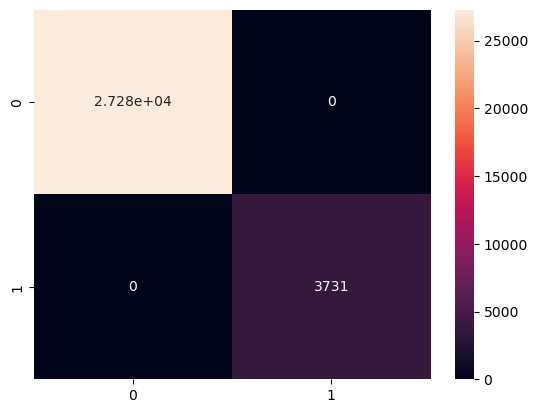

In [311]:
sb.heatmap(confusion_matrix(y_train,y_pred_train) ,annot = True , fmt = '.4g')

<Axes: >

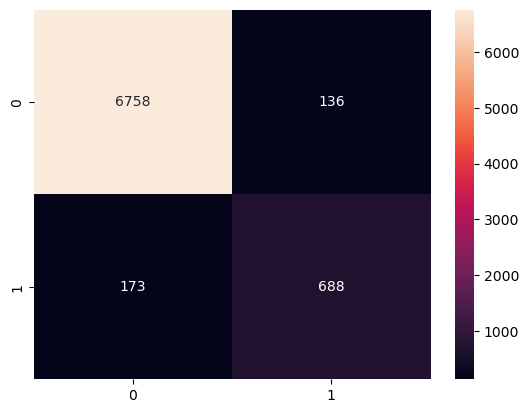

In [313]:
sb.heatmap(confusion_matrix(y_test,y_pred_test) ,annot = True , fmt = '.4g')